In [9]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

In [10]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [11]:
x_train = x_train / 255.0
x_test = x_test / 255.0

In [12]:
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

In [13]:
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [14]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [15]:
model.fit(x_train, y_train, epochs=10, validation_split=0.1)

Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 50s 28ms/step - accuracy: 0.7672 - loss: 0.6354 - val_accuracy: 0.8708 - val_loss: 0.3488
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 48s 29ms/step - accuracy: 0.8826 - loss: 0.3186 - val_accuracy: 0.8913 - val_loss: 0.2999
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 81s 28ms/step - accuracy: 0.9027 - loss: 0.2655 - val_accuracy: 0.8910 - val_loss: 0.2939
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 81s 28ms/step - accuracy: 0.9132 - loss: 0.2357 - val_accuracy: 0.9062 - val_loss: 0.2544
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 48s 29ms/step - accuracy: 0.9249 - loss: 0.2035 - val_accuracy: 0.9147 - val_loss: 0.2418
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 82s 29ms/step - accuracy: 0.9337 - loss: 0.1751 - val_accuracy: 0.9085 - val_loss: 0.2526
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 81s 28ms/step - accuracy: 0.9423 - loss: 0.1527 - val_accuracy: 0.9147 - val_loss: 0.2392
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 81s 28ms/step - accuracy: 0.9483 -

In [16]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"\nTest Accuracy: {test_acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9057 - loss: 0.2968

Test Accuracy: 0.9083


In [17]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [18]:
predictions = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


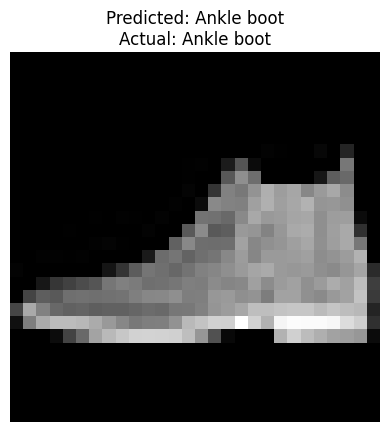

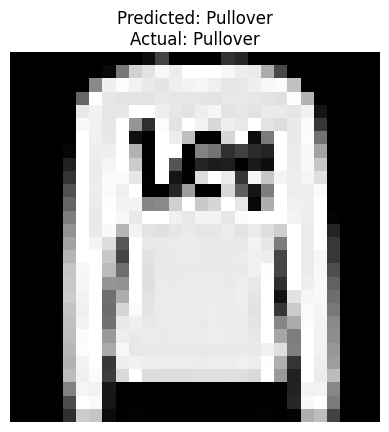

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# Predict on test data
predictions = model.predict(x_test)

# Show predictions for first 2 images
for i in range(2):
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    predicted_label = np.argmax(predictions[i])
    actual_label = y_test[i]
    plt.title(f"Predicted: {class_names[predicted_label]}\nActual: {class_names[actual_label]}")
    plt.axis('off')
    plt.show()
